In [2]:
import colorama
from colorama import Fore , Back , Style

def create_PM_table(pattern):
    
    table = [0] * len(pattern)
    j = 0
    # "ABABCABAB"
    for i in range(1, len(pattern)):
        while j > 0 and pattern[i] != pattern[j]:
            j = table[j - 1]
        if pattern[i] == pattern[j]:
            j += 1
        table[i] = j
    print('================================')
    print(Fore.GREEN+'Partial Match Table : '+Style.RESET_ALL,table)
    print('================================') 
    return table

def kmp_search(text, pattern):
     
    if not text or not pattern:
        return []

    # Build the partial match table
    partial_match_table = create_PM_table(pattern)
    
    matches = []
    j = 0  # index for pattern
    for i in range(len(text)):
        while j > 0 and text[i] != pattern[j]:
            j = partial_match_table[j - 1]
        if text[i] == pattern[j]:
            j += 1
        if j == len(pattern):
            matches.append(i - j + 1)
            j = partial_match_table[j - 1]

    return matches

print('================================')
text = input(Fore.BLUE+'Enter Text : ')#"ABABDABACDABABCABAB"
print('================================')
pattern = input(Fore.BLUE+'Enter Pattern to Search : '+Style.RESET_ALL)
matches = kmp_search(text, pattern)
if matches :
    print('================================')
    print(Fore.GREEN+"Pattern found at indices:"+Style.RESET_ALL, matches)
    print('================================')
else:
    print('================================')
    print(Fore.RED+'String Not matching at any Index'+Style.RESET_ALL)
    print('================================') 


Enter Text : afvbfdds
Enter Pattern to Search : dd
Partial Match Table :  [0, 1]
Pattern found at indices: [5]


........................................
..............WELCOME...................
........................................
Select a program to execute:
1. Bubbole sort
2. Counting sort
3. Heap sort(max heap)
4. Insertion sort
5. Merge sort
6. Quick sort
7. Selection sort
8. Exit
Enter your choice: 6
Enter numbers to sort: [3,6,12,4,642,1,0]


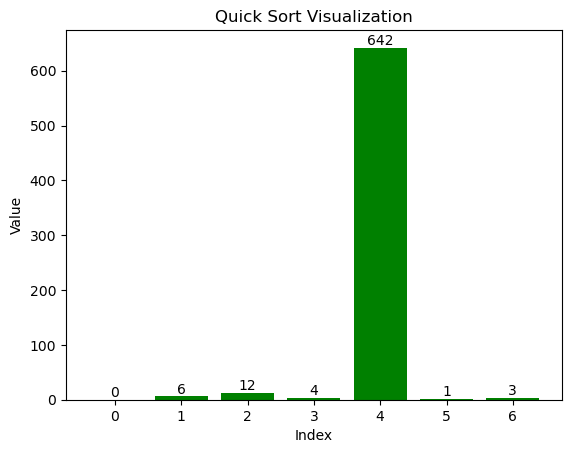

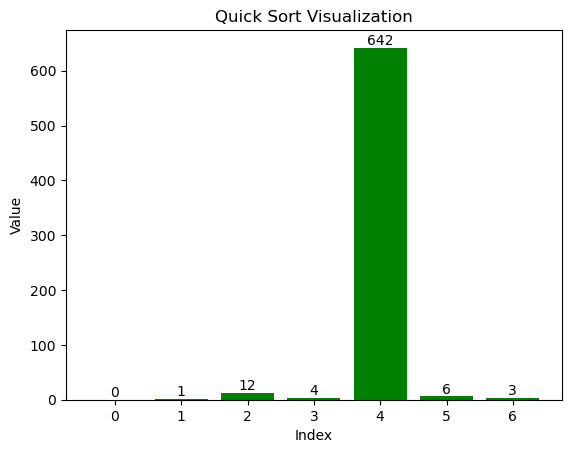

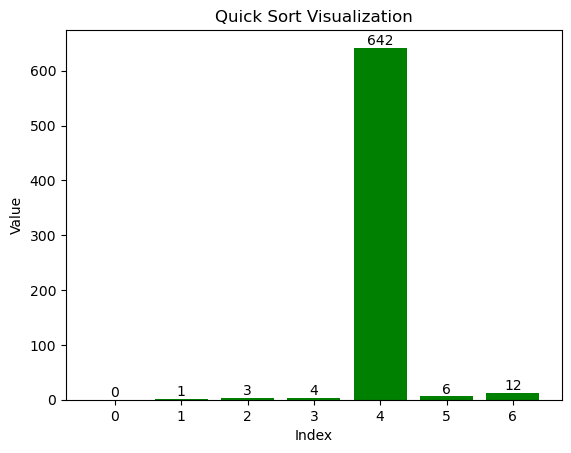

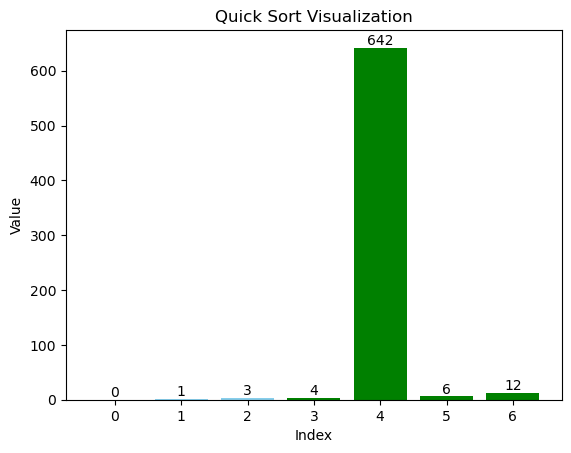

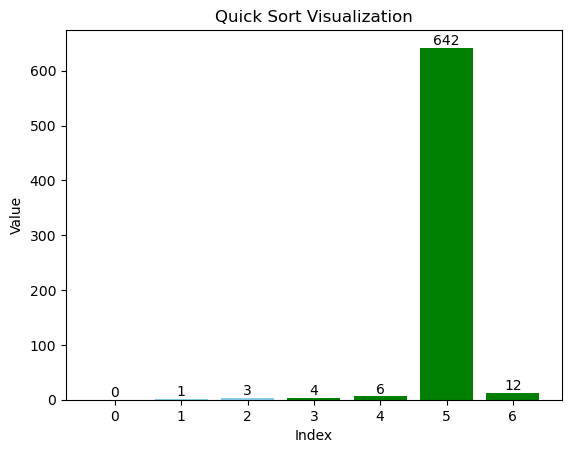

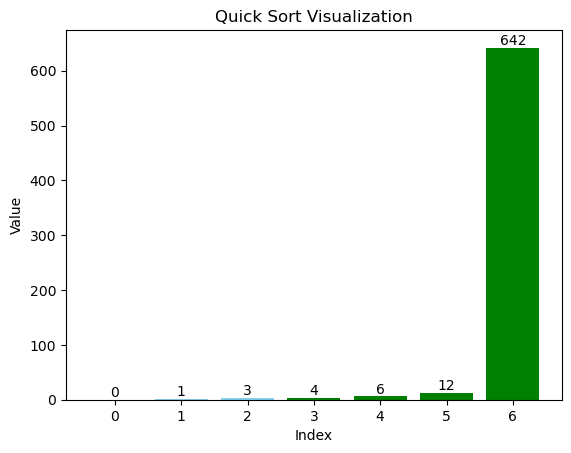

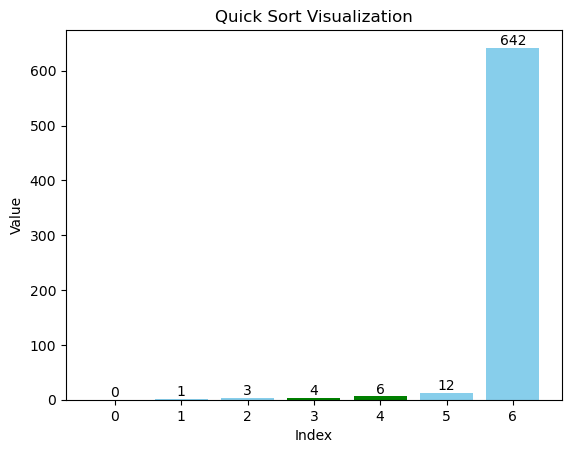

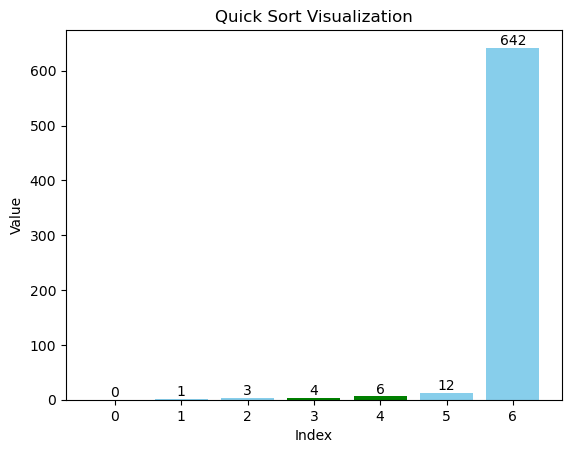

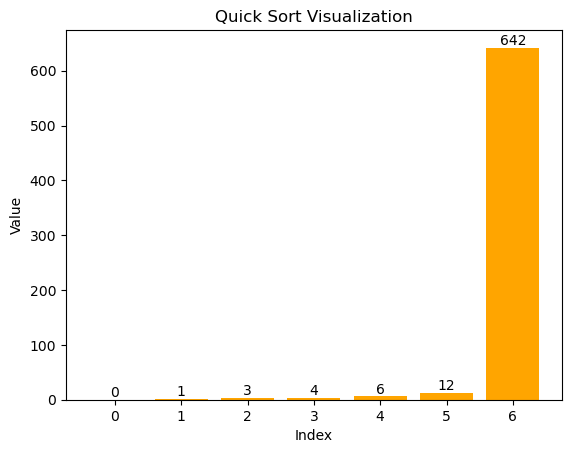

Select a program to execute:
1. Bubbole sort
2. Counting sort
3. Heap sort(max heap)
4. Insertion sort
5. Merge sort
6. Quick sort
7. Selection sort
8. Exit
Enter your choice: 8
Exiting...


In [1]:
#Algorithm Visualizer
import matplotlib.pyplot as plt

def program1():
    #bubbole sort

    def visualize_sorting(number_list, compare_indices=None, color='skyblue'):
        plt.clf()
        if compare_indices:
            colors = []
            for i in range(len(number_list)):
                if i in compare_indices:
                    colors.append('green')
                else:
                    colors.append(color)
        else:
            colors = color
        plt.bar(range(len(number_list)), number_list, color=colors)
        for i in range(len(number_list)):
            plt.text(i,number_list[i], str(number_list[i]), ha='center', va='bottom')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title('Sorting Visualization')
        plt.pause(0.31)

    number_list = eval(input("Enter numbers to sort:"))

    length = len(number_list)

    for i in range(length - 1):
        for j in range(length - 1 - i):
            if number_list[j] > number_list[j + 1]:
                visualize_sorting(number_list, compare_indices=[j, j+1])  # Pass indices being compared
                number_list[j], number_list[j + 1] = number_list[j + 1], number_list[j]

    # Final visualization after sorting is complete, with all bars colored orange
    visualize_sorting(number_list, color='orange')
    plt.show()

    

def program2():
    # counting sort

    def visualize_sorting(number_list, compare_indices=None, color='skyblue', min_index=None,comaparing=False):
        plt.clf()
        if compare_indices:
            colors = []
            for i in range(len(number_list)):
                if comaparing:
                    if i in compare_indices:
                        colors.append('green')
                    else:
                        colors.append(color)
                else:
                    if i in compare_indices:
                        colors.append('magenta')
                    else:
                        colors.append(color)
        else:
            colors = color
        plt.bar(range(len(number_list)), number_list, color=colors)
        for i in range(len(number_list)):
            plt.text(i, number_list[i], str(number_list[i]), ha='center', va='bottom')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title('Counting Sort Visualization')
        plt.pause(2)

    def counting_sort(arr):
        n = len(arr)
        output = [0] * n
        count = [0] * (max(arr) + 1)
        for i in arr:
            count[i] += 1

        for i in range(1, len(count)):
            count[i] += count[i - 1]

        for i in range(n - 1, -1, -1):
            output[count[arr[i]] - 1] = arr[i]
            count[arr[i]] -= 1
            visualize_sorting(output, compare_indices=[count[arr[i]]], comaparing=True)

        for i in range(n):
            arr[i] = output[i]
            visualize_sorting(output, compare_indices=[i])

    number_list = eval(input("Enter numbers to sort: "))
    counting_sort(number_list)
    visualize_sorting(number_list, color='orange')
    plt.show()

   
def program3():
    # heap sort

    def heapify(arr, n, i, compare_indices=None, color='skyblue'):
        largest = i  
        l = 2 * i + 1     
        r = 2 * i + 2    

        if l < n and arr[i] < arr[l]:
            largest = l

        if r < n and arr[largest] < arr[r]:
            largest = r

        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]  
            visualize_sorting(arr, compare_indices=[i, largest], color=color)  # Visualize swapping
            heapify(arr, n, largest, compare_indices, color)


    def heap_sort(arr):
        n = len(arr)

        for i in range(n // 2 - 1, -1, -1):
            heapify(arr, n, i)

        for i in range(n - 1, 0, -1):
            arr[i], arr[0] = arr[0], arr[i]  
            visualize_sorting(arr, compare_indices=[0, i], color='orange')  # Visualize swapping
            heapify(arr, i, 0)


    def visualize_sorting(number_list, compare_indices=None, color='skyblue'):
        plt.clf()
        if compare_indices:
            colors = [color if i not in compare_indices else 'magenta' for i in range(len(number_list))]
        else:
            colors = color
        plt.bar(range(len(number_list)), number_list, color=colors)
        for i in range(len(number_list)):
            plt.text(i, number_list[i], str(number_list[i]), ha='center', va='bottom')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title('Heap Sort Visualization')
        plt.pause(1)


    number_list = eval(input("Enter numbers to sort: "))
    heap_sort(number_list)
    plt.show()

   
def program4(): 
        # insertion sort

    def visualize_sorting(number_list,compare_indices=None, color='skyblue', min_index=None,comaparing=False):
        plt.clf()
        if compare_indices:
            colors = []
            for i in range(len(number_list)):
                if comaparing:
                    if i in compare_indices:
                        colors.append('green')
                    else:
                        colors.append(color)
                else:
                    if i in compare_indices:
                        colors.append('magenta')
                    else:
                        colors.append(color)
        else:
            colors=color
        plt.bar(range(len(number_list)), number_list, color=colors)
        for i in range(len(number_list)):
            plt.text(i, number_list[i], str(number_list[i]), ha='center', va='bottom')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title('Sorting Visualization')
        plt.pause(1)

    number_list = eval(input("Enter numbers to sort: "))
    for i in range(1,len(number_list)):
        x=number_list[i]
        j=i-1
        while(j>=0 and x<number_list[j]):
            number_list[j+1]=number_list[j]
            visualize_sorting(number_list, compare_indices=[j, j+1],comaparing=True)
            j=j-1
        number_list[j+1]=x
        visualize_sorting(number_list, compare_indices=[j+1])
    visualize_sorting(number_list, color='orange')
    print(number_list)
    plt.show()
def program5():
    # merge sort

    def visualize_sorting(number_list, color='skyblue', start=None, end=None):
        plt.clf()
        colors = [color] * len(number_list)
        if start is not None and end is not None:
            colors[start:end+1] = ['green'] * (end - start + 1)
        plt.bar(range(len(number_list)), number_list, color=colors)
        for i in range(len(number_list)):
            plt.text(i, number_list[i], str(number_list[i]), ha='center', va='bottom')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title('Merge Sort Visualization')
        plt.pause(0.5)

    def merge(arr, left, right, mid):
        temp = [0] * (right - left + 1)
        i = left
        j = mid + 1
        k = 0

        while i <= mid and j <= right:
            if arr[i] <= arr[j]:
                temp[k] = arr[i]
                i += 1
            else:
                temp[k] = arr[j]
                j += 1
            k += 1

        while i <= mid:
            temp[k] = arr[i]
            i += 1
            k += 1

        while j <= right:
            temp[k] = arr[j]
            j += 1
            k += 1

        for i in range(left, right + 1):
            arr[i] = temp[i - left]

    def merge_sort(arr, left, right):
        if left < right:
            mid = (left + right) // 2
            merge_sort(arr, left, mid)
            merge_sort(arr, mid + 1, right)
            merge(arr, left, right, mid)
            visualize_sorting(arr, start=left, end=right)

    number_list = eval(input("Enter numbers to sort: "))
    merge_sort(number_list, 0, len(number_list) - 1)
    visualize_sorting(number_list, color='orange')
    plt.show()

def program6(): 
    # quik sort

    def visualize_sorting(number_list, pivot_index=None, color='skyblue', low=None, high=None):
        plt.clf()
        colors = [color] * len(number_list)
        if pivot_index is not None:
            colors[pivot_index] = 'magenta'
        if low is not None:
            colors[low:high+1] = ['green'] * (high - low + 1)
        plt.bar(range(len(number_list)), number_list, color=colors)
        for i in range(len(number_list)):
            plt.text(i, number_list[i], str(number_list[i]), ha='center', va='bottom')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title('Quick Sort Visualization')
        plt.pause(0.5)

    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
                visualize_sorting(arr, pivot_index=high, low=low, high=high)
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        visualize_sorting(arr, pivot_index=i+1, low=low, high=high)
        return i + 1

    def quick_sort(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            quick_sort(arr, low, pi - 1)
            quick_sort(arr, pi + 1, high)

    number_list = eval(input("Enter numbers to sort: "))
    quick_sort(number_list, 0, len(number_list) - 1)
    visualize_sorting(number_list, color='orange')
    plt.show()

def program7():
        # selection sort

    def visualize_sorting(number_list, compare_indices=None, color='skyblue', min_index=None,comaparing=False):
        plt.clf()
        if compare_indices:
            colors = []
            for i in range(len(number_list)):
                if comaparing:
                    if i in compare_indices:
                        colors.append('magenta')  # Highlight current minimum value being compared
                    else:
                        colors.append(color)
                else:
                    if i in compare_indices:
                        colors.append('green')
                    else:
                        colors.append(color)
        else:
            colors = color
        plt.bar(range(len(number_list)), number_list, color=colors)
        for i in range(len(number_list)):
            plt.text(i, number_list[i], str(number_list[i]), ha='center', va='bottom')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title('Sorting Visualization')
        plt.pause(1)

    number_list = eval(input("Enter numbers to sort: "))
    length = len(number_list)

    for i in range(length-1):
        min_index = i
        for j in range(i+1, length):
            if number_list[j] < number_list[min_index]:
                visualize_sorting(number_list, compare_indices=[i, j], min_index=min_index,comaparing=True)  # Visualize comparison
                min_index = j
            
        if min_index != i:
            number_list[i], number_list[min_index] = number_list[min_index], number_list[i]
            visualize_sorting(number_list, compare_indices=[i, j], min_index=min_index)  # Visualize comparison
        visualize_sorting(number_list)  # Visualize current state of the list

    # Final visualization after sorting is complete, with all bars colored orange
    visualize_sorting(number_list, color='orange')
    plt.show()



def main():
    print("........................................")
    print("..............WELCOME...................")
    print("........................................")
    while True:
        print("Select a program to execute:")
        print("1. Bubbole sort")
        print("2. Counting sort")
        print("3. Heap sort(max heap)")
        print("4. Insertion sort")
        print("5. Merge sort")
        print("6. Quick sort")
        print("7. Selection sort")
        print("8. Exit")

        choice = str(input("Enter your choice: "))

        if choice == '1':
            program1()
        elif choice == '2':
            program2()
        elif choice == '3':
            program3()
        elif choice == '4':
            program4()
        elif choice == '5':
            program5()
        elif choice == '6':
            program6()
        elif choice == '7':
            program7() 
        elif choice == '8':
            print("Exiting...")
            break  # Exiting the while loop when the user chooses to exit
        else:
            print("Invalid choice")
            print()
            print()

if __name__ == "__main__":
    main()


In [7]:
array = eval(input('elements : '))
max_ele=max(array)
empty=[0]*(max_ele+1)
for i in array:
    empty[i]+=1
print(empty)
op=[]
for i in range(len(empty)) :
    if empty[i]!=0:
        for j in range(empty[i]):
            op.append(i)
print(op)

elements : [3,6,5,4,2,3]
[0, 0, 1, 2, 1, 1, 1]
[2, 3, 3, 4, 5, 6]
